## Exploratory Data Analysis


### Importing packages

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
import re


### Importing cleaned dataset

In [85]:
df = pd.read_csv('data/clean_resume_dataset.csv')
df.head()

,Category,Resume,clean_text
0,Accountant,education omba executive leadership university...,education omba executive leadership bachelor ...
1,Accountant,howard gerrard accountant deyjobcom birmingham...,accountant deyjobcom infodayjobcom linkedinn...
2,Accountant,kevin frank senior accountant inforesumekraftc...,senior accountant inforesumekraftcom chicago ...
3,Accountant,place birth nationality olivia ogilvy accounta...,place birth nationality olivia accountant 151...
4,Accountant,stephen greet cpa senior accountant 9 year exp...,cpa senior accountant year experience establi...


In [86]:
df.tail()

,Category,Resume,clean_text
12239,Testing,Computer Skills: â¢ Proficient in MS office (...,in MS office Word Basic Excel Power point wo...
12240,Testing,â Willingness to accept the challenges. â ...,Willingness to accept the challenges Positive ...
12241,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
12242,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE wind I nt...
12243,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...,Windows XP Database MYSQL sql server 2005 200...


In [87]:
print(f'\nSize of dataset: ', df.shape) #might not be enuf 
print(f'\nCheck for empty cells:\n', df.isnull().sum()) 
df['resume_length'] = df['clean_text'].apply(len) #Created 'resume_length' column
print(f'\nResume Length:',df[['clean_text', 'resume_length']].head())
df['sentiment'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity) #Applying sentiment analysis 
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")
print(f'\nData types:\n', df.dtypes) 
print(f'\nNumber of unique cell in each column:\n', df.nunique()) 


Size of dataset:  (12244, 3)

Check for empty cells:
 Category      0
Resume        0
clean_text    0
dtype: int64

Resume Length:                                           clean_text  resume_length
0  education omba executive leadership  bachelor ...           1227
1   accountant deyjobcom  infodayjobcom linkedinn...           1942
2   senior accountant inforesumekraftcom chicago ...           2062
3  place birth nationality olivia  accountant 151...           2143
4   cpa senior accountant year experience establi...           1560
Number of duplicate rows: 0

Data types:
 Category          object
Resume            object
clean_text        object
resume_length      int64
sentiment        float64
dtype: object

Number of unique cell in each column:
 Category            43
Resume           12244
clean_text       12233
resume_length     5679
sentiment        11438
dtype: int64


In [88]:
df['Category'].unique()

array(['Accountant', 'Advocate', 'Agriculture', 'Apparel', 'Architecture',
       'Arts', 'Automobile', 'Aviation', 'Banking', 'Blockchain',
       'Business Process Outsourcing', 'Building and Construction',
       'Business Analyst', 'Civil Engineer', 'Consultant', 'Data Science',
       'Database', 'Designing', 'DevOps', 'Digital Media',
       'DotNet Developer', 'Education', 'Electrical Engineering',
       'ETL Developer', 'Finance', 'Food and Beverages',
       'Health and Fitness', 'Human Resources', 'Information Technology',
       'Java Developer', 'Management', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager',
       'Project Management', 'Public Relations', 'Python Developer',
       'React Developer', 'Sales', 'SAP Developer', 'SQL Developer',
       'Testing', 'Web Designing'], dtype=object)

In [89]:
# Summary of the dataset
print("\nSummary for Category column:")
print(df['Category'].describe())
print(f"Number of unique values in 'Category': {df['Category'].nunique()}")

print("\nSummary for Resume column:")
print(df['Resume'].describe())
print(f"Number of unique values in 'Resume': {df['Resume'].nunique()}")

print("\nSummary for clean_text column:")
print(df['clean_text'].describe())
print(f"Number of unique values in 'clean_text': {df['clean_text'].nunique()}")

print("\nSummary for resume_length column:")
print(df['resume_length'].describe())
print(f"Number of unique values in 'resume_length': {df['resume_length'].nunique()}")

print("\nSummary for sentiment column:")
print(df['sentiment'].describe())
print(f"Number of unique values in 'sentiment': {df['sentiment'].nunique()}")


Summary for Category column:
count         12244
unique           43
top       Education
freq            388
Name: Category, dtype: object
Number of unique values in 'Category': 43

Summary for Resume column:
count                                                 12244
unique                                                12244
top       education omba executive leadership university...
freq                                                      1
Name: Resume, dtype: object
Number of unique values in 'Resume': 12244

Summary for clean_text column:
count                                                 12244
unique                                                12233
top        lane san francisco california phone email sam...
freq                                                      2
Name: clean_text, dtype: object
Number of unique values in 'clean_text': 12233

Summary for resume_length column:
count    12244.000000
mean      3751.321464
std       2579.993830
min         39.000000
25%  

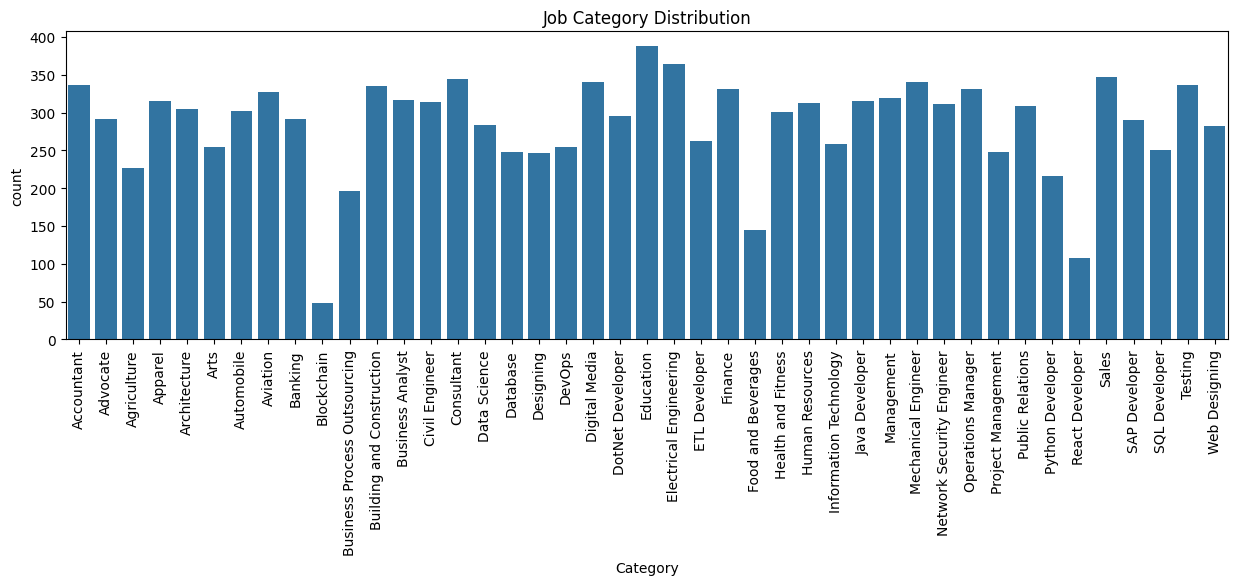

In [90]:
# Distribution of the different job categories
plt.figure(figsize=(15,4))
sns.countplot(x='Category', data=df)
plt.title('Job Category Distribution')
plt.xticks(rotation=90)
plt.show()

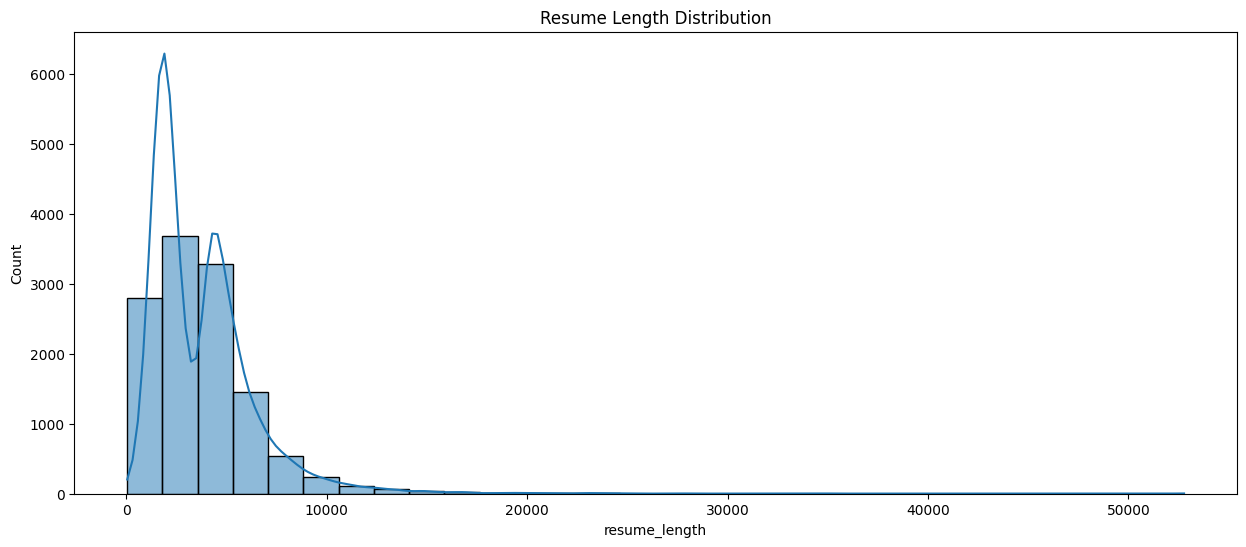

In [91]:
# Visualize the distribution of text length of the resumes
plt.figure(figsize=(15,6))
sns.histplot(df['resume_length'], kde=True, bins=30)
plt.title('Resume Length Distribution')
plt.show()

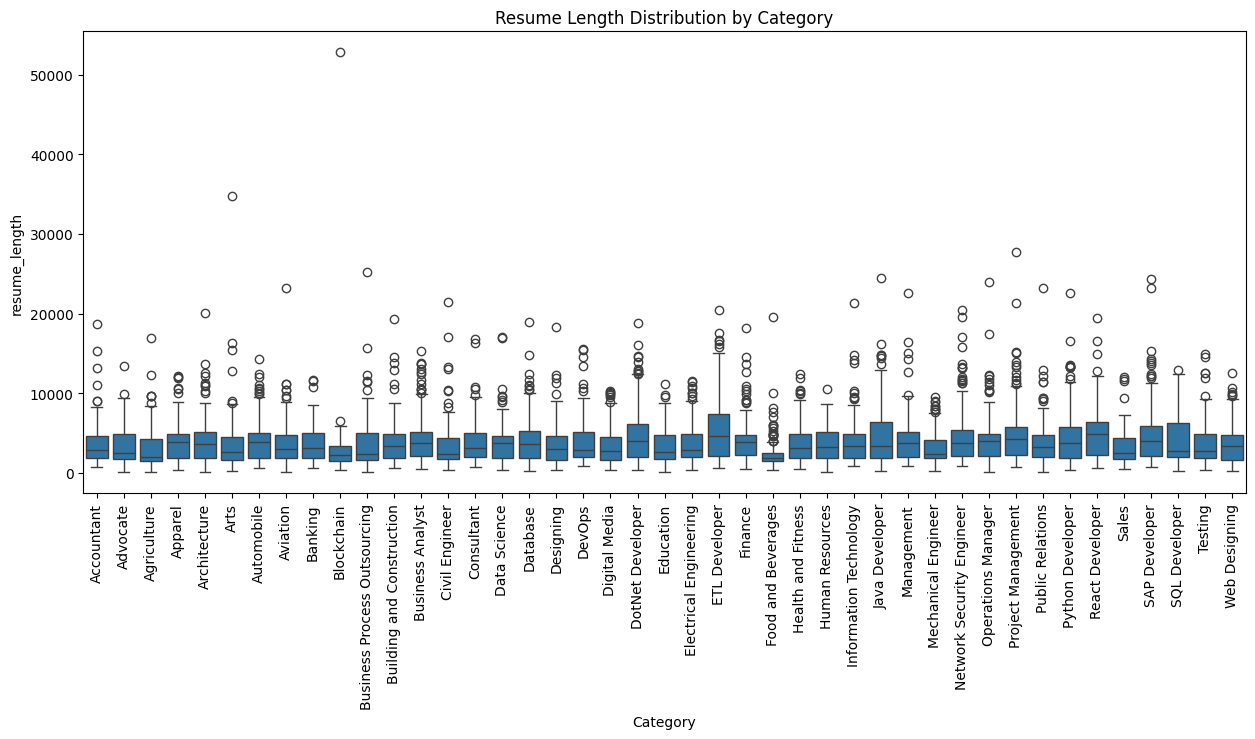

In [92]:
# Distribution of resume_length for each of the job category
plt.figure(figsize=(15, 6))
sns.boxplot(x='Category', y='resume_length', data=df)
plt.title('Resume Length Distribution by Category')
plt.xticks(rotation=90)
plt.show()

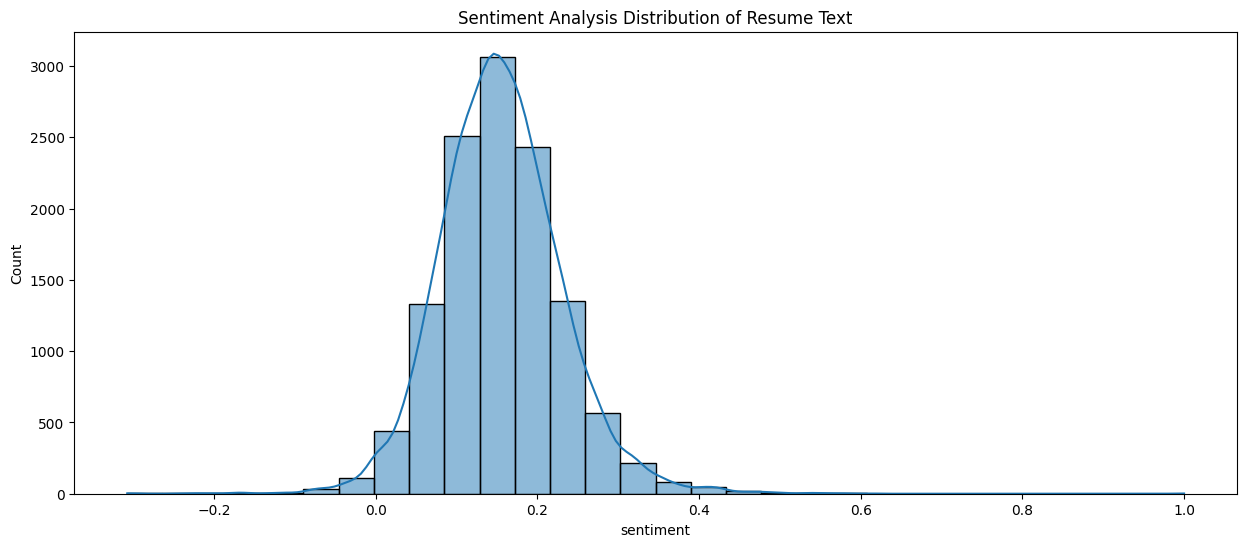

In [93]:
# Distribution of the sentiment analysis
plt.figure(figsize=(15, 6))
sns.histplot(df['sentiment'], kde=True, bins=30)
plt.title('Sentiment Analysis Distribution of Resume Text')
plt.show()


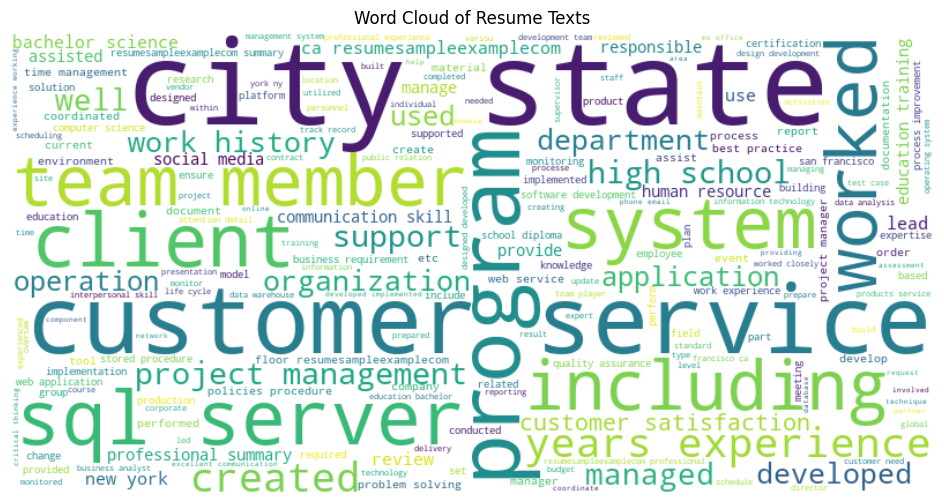

In [94]:
# Create Word Cloud
text = " ".join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Resume Texts')
plt.show()


In [95]:
# Top 10 words in each category
categories = df['Category'].unique()

for category in categories:
    category_text = " ".join(df[df['Category'] == category]['clean_text'])
    category_words = " ".join(category_text.split()).lower()
    category_words = re.sub(r'[^a-z\s]', '', category_words)
    word_counts = Counter(category_words.split())
    common_words = word_counts.most_common(10)
    print(f"\nTop 10 Most Frequent Words in {category} Category:", common_words)



Top 10 Most Frequent Words in Accountant Category: [('financial', 2188), ('accounting', 2168), ('accounts', 1289), ('tax', 997), ('management', 986), ('accountant', 915), ('reports', 816), ('business', 755), ('skills', 704), ('monthly', 668)]

Top 10 Most Frequent Words in Advocate Category: [('customer', 1378), ('service', 906), ('skills', 829), ('advocate', 591), ('management', 574), ('customers', 573), ('services', 535), ('experience', 534), ('clients', 528), ('work', 524)]

Top 10 Most Frequent Words in Agriculture Category: [('equipment', 622), ('agricultural', 530), ('work', 467), ('experience', 447), ('skills', 444), ('management', 418), ('farm', 381), ('team', 327), ('customer', 327), ('agriculture', 318)]

Top 10 Most Frequent Words in Apparel Category: [('customer', 1819), ('sales', 1651), ('customers', 1393), ('service', 993), ('store', 945), ('merchandise', 896), ('team', 858), ('skills', 857), ('new', 814), ('product', 811)]

Top 10 Most Frequent Words in Architecture Cat